<a href="https://colab.research.google.com/github/AftabUdaipurwala/Deeplearning/blob/main/Clustering_Algorithm_for_Colors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from google.colab import drive
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive/MyDrive/py-master/ML/13_kmeans/' # listing all the contents in the drive

/content/drive/MyDrive/py-master/ML/13_kmeans/colour_shades_LCH_Values.csv


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/py-master/ML/13_kmeans/colour_shades_LCH_Values.csv')
df.head()


,Colour,L,A,B,C,H
0,BR473,27.58,5.15,-4.70,6.97,317.60
1,MA485,27.60,8.53,-0.56,8.55,356.24
2,BLP12,28.36,9.40,-25.72,27.38,290.08
3,BR205,28.47,3.23,0.87,3.35,15.03
4,MA149,28.78,12.58,0.41,12.59,1.85


In [ ]:
df.columns = ['Colour', 'L', 'A', 'B', 'C', 'H']

In [ ]:
km = KMeans(n_clusters=21, random_state=42)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=21, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df[['L']])
df['L']= scaler.transform(df[['L']])
scaler.fit(df[['H']])
df['H']= scaler.transform(df[['H']])
scaler.fit(df[['C']])
df['C']= scaler.transform(df[['C']])
ypred= km.fit_predict(df[['L','H','C']])
ypred


array([11, 11, 11, ..., 12, 12, 12], dtype=int32)

In [ ]:
df['cluster']=ypred
df.head()

,Colour,L,A,B,C,H,cluster
0,BR473,0.000000,5.15,-4.70,0.094930,0.882119,11
1,MA485,0.000350,8.53,-0.56,0.118148,0.989622,11
2,BLP12,0.013665,9.40,-25.72,0.394857,0.805553,11
3,BR205,0.015592,3.23,0.87,0.041734,0.040314,8
4,MA149,0.021023,12.58,0.41,0.177517,0.003645,8


In [ ]:
score=[]
X = df[['L','C','H']]

for i in range(2,100):
  model = KMeans(i, random_state=42)
  visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
  visualizer.fit(X)
  score.append(visualizer.silhouette_score_)
  

In [ ]:
print("Maximum value of Average Silhoutte Score is at", score.index(max(score))+2,"Cluster and its value is", round(max(score)*100,2))

Maximum value of Average Silhoutte Score is at 21 Cluster and its value is 43.18


In [ ]:
print("Minimum value of Average Silhoutte Score is at", score.index(min(score))+2,"Cluster and its value is", round(min(score)*100,2))

Minimum value of Average Silhoutte Score is at 2 Cluster and its value is 33.09


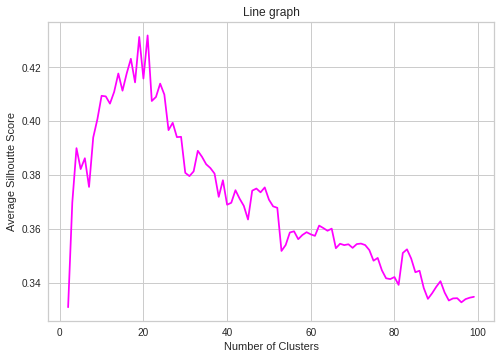

In [ ]:

plt.title("Line graph")
plt.xlabel("Number of Clusters")
plt.ylabel("Average Silhoutte Score")
plt.plot(np.arange(2,100), score, color ="Magenta")
plt.show()

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f11219af750>,
                     model=None)

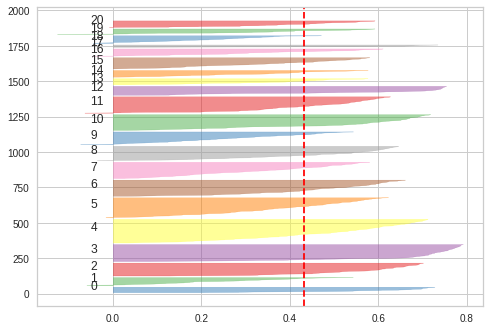

In [ ]:
# Instantiate the clustering model and visualizer
model = KMeans(21, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)